In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Завдання 1

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

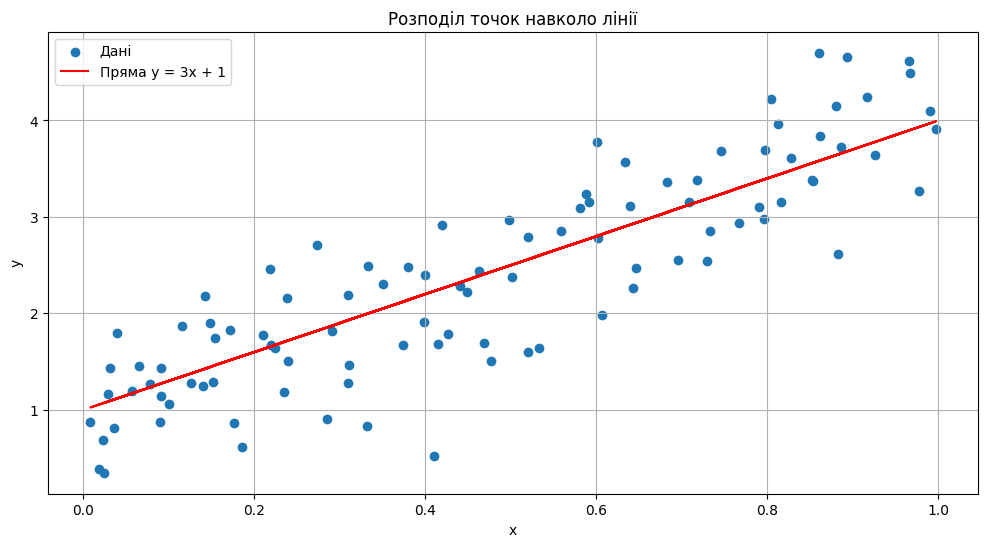

In [10]:
n = 100
k = 3
b = 1
x = np.random.rand(n)
data = np.random.normal(0, 0.5, n)
y = k * x + b + data

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', label=f'Пряма y = {k}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Розподіл точок навколо лінії')
plt.legend()
plt.grid(True)
plt.show()

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [11]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    k = (np.sum((x - x_mean) * (y - y_mean))) / (np.sum((x - x_mean)**2))
    b = y_mean - k * x_mean

    return k, b

Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [12]:
k_fit, b_fit = least_squares(x, y)
k_poly, b_poly = np.polyfit(x, y, 1)
print("Оцінені значення:", k_fit, b_fit)
print("Значення np.polifit -", k_poly, b_poly)
print("Оригінальні значення -", k, b)

Оцінені значення: 3.204863162139213 0.8693722031334561
Значення np.polifit - 3.204863162139213 0.8693722031334555
Оригінальні значення - 3 1


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

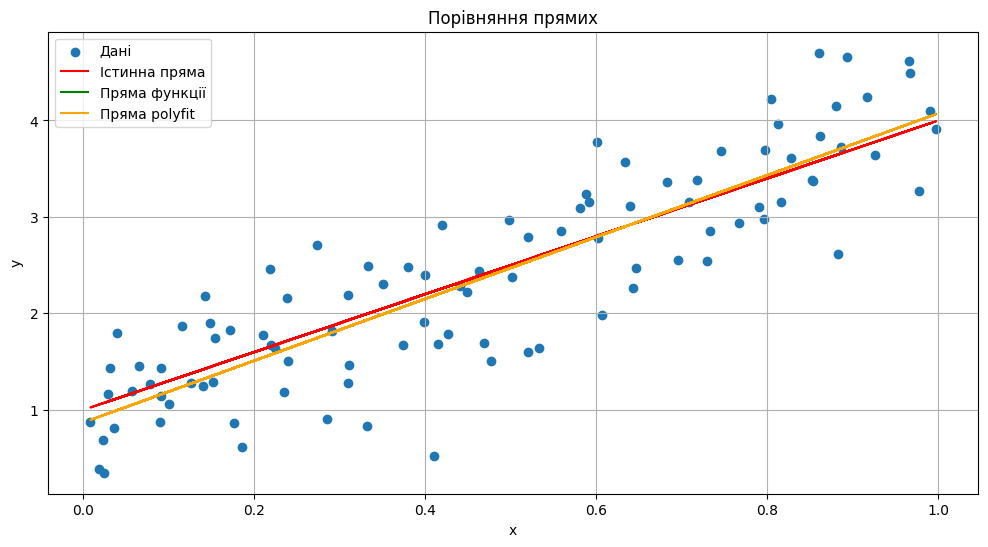

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', label='Істинна пряма')
plt.plot(x, k_fit * x + b_fit, color='green', label='Пряма функції')
plt.plot(x, k_poly * x + b_poly, color='orange', label='Пряма polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння прямих')
plt.legend()
plt.grid(True)
plt.show()

# Завдання 2

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [14]:
def gradient(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    n = len(x)
    loss = []
    for _ in range(n_iter):
        y_pred = k * x + b
        error = (y_pred - y)
        loss.append(np.mean(error**2))

        dk = (2 / n) * np.dot(error, x)
        db = (2 / n) * np.sum(error)

        k -= learning_rate * dk
        b -= learning_rate * db
    return k, b, loss


k_grad, b_grad, loss = gradient(x, y)
print("Оптимальна оцінка k та b -", k_grad, b_grad)

Оптимальна оцінка k та b - 2.680740950629929 1.1324593920680053


Додайте отриману лінію регресії на загальний графік

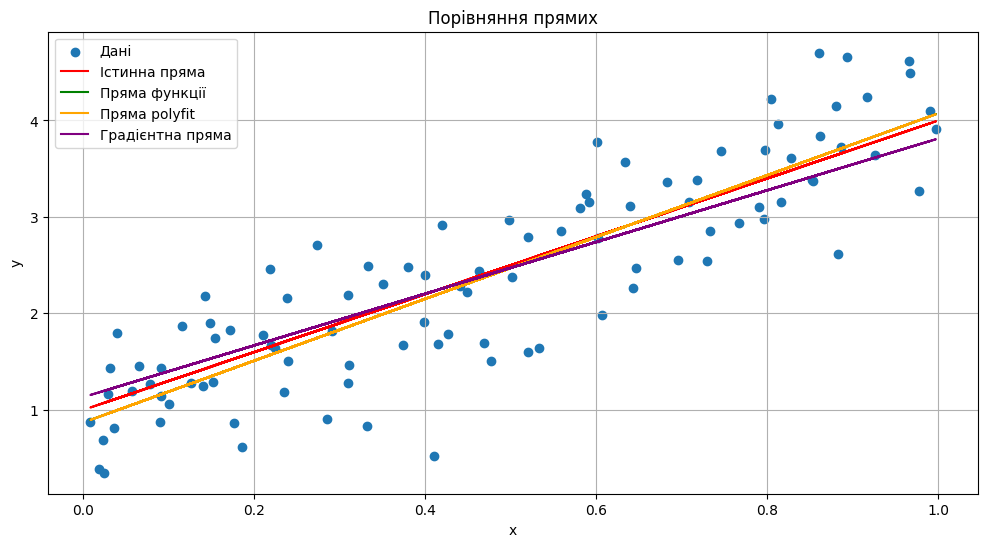

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', label='Істинна пряма')
plt.plot(x, k_fit * x + b_fit, color='green', label='Пряма функції')
plt.plot(x, k_poly * x + b_poly, color='orange', label='Пряма polyfit')
plt.plot(x, k_grad * x + b_grad, color='purple', label='Градієнтна пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння прямих')
plt.legend()
plt.grid(True)
plt.show()

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

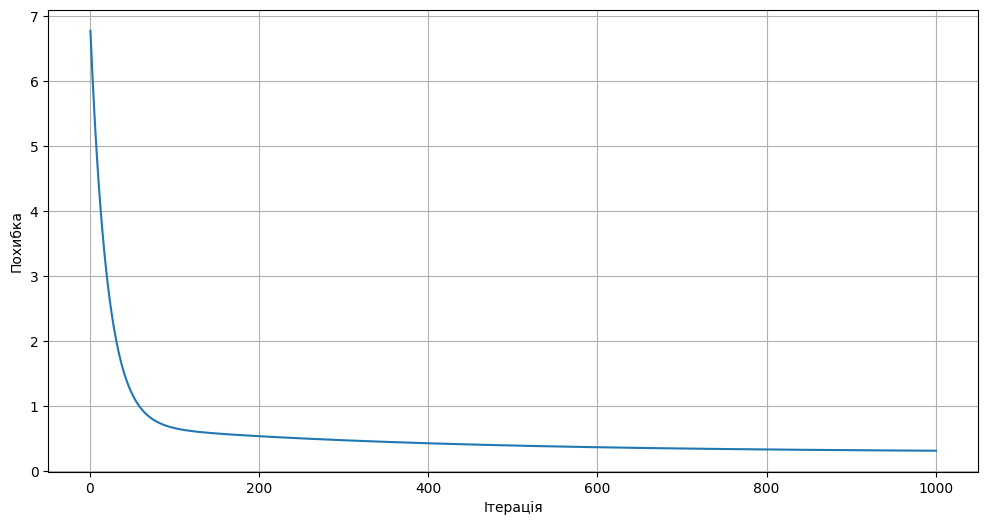

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel("Ітерація")
plt.ylabel("Похибка")
plt.grid(True)
plt.show()